In [62]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [63]:
import math
 
def from_points(cell_size, points):
    hashmap = HashMap(cell_size)
    for point in points:
        dict_setdefault(hashmap.grid, hashmap.key(point),[]).append(point)
    return hashmap
 
def dict_setdefault(D, k, d):
    r = D.get(k,d)
    if k not in D:
        D[k] = d
    return r

In [64]:
class HashMap(object):
    def __init__(self, cell_size):
        self.cell_size = cell_size
        self.grid = {}
 
    def key(self, point):
        cell_size = self.cell_size
        return (
            int((math.floor(point[0]/cell_size))*cell_size),
            int((math.floor(point[1]/cell_size))*cell_size)
        )
 
    def insert(self, point):
        dict_setdefault( self.grid, self.key(point), []).append(point)
   
    def query(self, point):
        return dict_setdefault( self.grid, self.key(point), [])

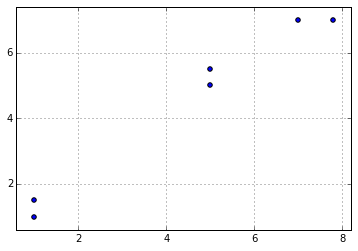

In [65]:
import matplotlib.pyplot as plt
import numpy

x = numpy.array([1,1,5,5,7,7.8])
y = numpy.array([1,1.5,5.5,5,7,7])

fig = plt.figure()
ax = fig.gca()
ax.set_xticks(numpy.arange(0,12,2))
ax.set_yticks(numpy.arange(0,12,2))
plt.scatter(x,y)
plt.grid()
plt.show()

In [66]:
points = []

for i in range(0,len(x)):
    points.append((x[i], y[i]))

hashmap = from_points(2, points)
print hashmap.query((0.0,0.0))

hashmap.insert((1.2,1.3))
print hashmap.query((0.0,0.0))

[(1.0, 1.0), (1.0, 1.5)]
[(1.0, 1.0), (1.0, 1.5), (1.2, 1.3)]


In [35]:
from bs4 import BeautifulSoup
import csv
f = open('land.kml', 'r')
soup=BeautifulSoup(f.read())
f.close()
csvfile = open('land.csv', 'wb')

spamwriter = csv.writer(csvfile, quoting=csv.QUOTE_MINIMAL)
for elem in soup.findAll('placemark'):
    for ele in elem.findAll('simpledata'):
        if ele.get('name').encode('utf-8') == '總價元':
            name =  int(ele.text)
    coordinates = elem.find('coordinates').text.split(',')
    lat = float(coordinates[0])
    lon = float(coordinates[1])
    spamwriter.writerow([name, lat, lon])
csvfile.close()

In [14]:
import numpy as np
from itertools import product, izip
from scipy.spatial import KDTree

pointsXY1 = np.array(list(product(xrange(3), xrange(3))))
print pointsXY1
k1 = KDTree(pointsXY1)

pointsXY2 = np.array(list(product(np.arange(0.5, 3), np.arange(0.5, 3))))
print pointsXY2
k2 = KDTree(pointsXY2)


[[0 0]
 [0 1]
 [0 2]
 [1 0]
 [1 1]
 [1 2]
 [2 0]
 [2 1]
 [2 2]]
[[ 0.5  0.5]
 [ 0.5  1.5]
 [ 0.5  2.5]
 [ 1.5  0.5]
 [ 1.5  1.5]
 [ 1.5  2.5]
 [ 2.5  0.5]
 [ 2.5  1.5]
 [ 2.5  2.5]]


In [17]:
# X, Y
from scipy.spatial import KDTree

distances, indices = k1.query((0, 0), k=2)
print pointsXY1[indices]
indices = k1.query_ball_point((0, 0), 1)
print pointsXY1[indices]

indexLists = k1.query_ball_tree(k2, 1)
for point, indices in izip(pointsXY1, indexLists):
    print '*** %s *** ' % point
    print pointsXY2[indices]
    
indexPairs = k1.query_pairs(1)
for index1, index2 in indexPairs:
    print pointsXY1[index1], pointsXY1[index2]

[[0 0]
 [0 1]]
[[0 0]
 [0 1]
 [1 0]]
*** [0 0] *** 
[[ 0.5  0.5]]
*** [0 1] *** 
[[ 0.5  0.5]
 [ 0.5  1.5]]
*** [0 2] *** 
[[ 0.5  1.5]
 [ 0.5  2.5]]
*** [1 0] *** 
[[ 0.5  0.5]
 [ 1.5  0.5]]
*** [1 1] *** 
[[ 0.5  0.5]
 [ 0.5  1.5]
 [ 1.5  0.5]
 [ 1.5  1.5]]
*** [1 2] *** 
[[ 0.5  1.5]
 [ 0.5  2.5]
 [ 1.5  1.5]
 [ 1.5  2.5]]
*** [2 0] *** 
[[ 1.5  0.5]
 [ 2.5  0.5]]
*** [2 1] *** 
[[ 1.5  0.5]
 [ 1.5  1.5]
 [ 2.5  0.5]
 [ 2.5  1.5]]
*** [2 2] *** 
[[ 1.5  1.5]
 [ 1.5  2.5]
 [ 2.5  1.5]
 [ 2.5  2.5]]
[0 0] [0 1]
[0 1] [0 2]
[1 1] [2 1]
[2 0] [2 1]
[1 1] [1 2]
[2 1] [2 2]
[0 1] [1 1]
[1 0] [2 0]
[0 0] [1 0]
[1 0] [1 1]
[0 2] [1 2]
[1 2] [2 2]


In [71]:
import networkx as nx

In [76]:
graph = nx.Graph()

graph.add_edge('台北101', '忠孝敦化', duration=5)
graph.add_edge('台北車站', '忠孝復興', duration=10)
graph.add_edge('忠孝復興', '忠孝敦化', duration=2)
graph.add_edge('忠孝敦化', '敦化南路二段', duration=10)

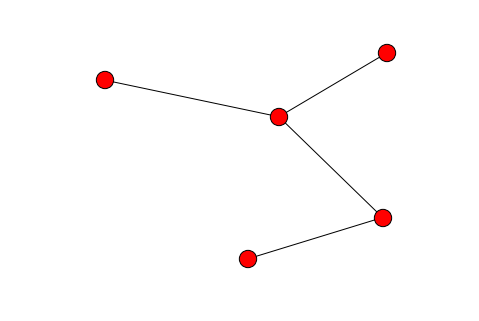

In [77]:
nx.draw(graph)

In [78]:
print [node for node, connectionCount in nx.degree(graph).iteritems() if connectionCount > 2][0]

忠孝敦化


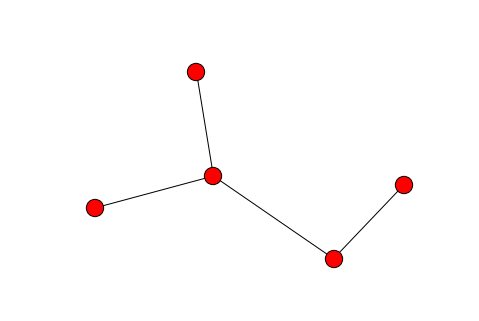

In [79]:
#labels=nx.draw_networkx_labels(graph,pos=nx.spring_layout(graph))
nx.draw(graph)

C:\Anaconda\lib\site-packages\matplotlib\text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
C:\Anaconda\lib\site-packages\matplotlib\text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


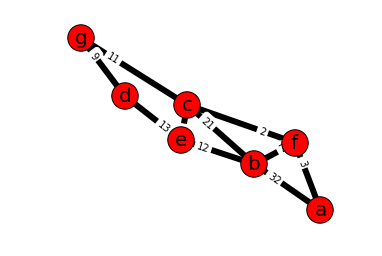

In [80]:
import networkx as nx

G=nx.Graph()

G.add_edge('a','b',weight=32)
G.add_edge('a','f',weight=3)
G.add_edge('b','c',weight=21)
G.add_edge('b','e',weight=12)
G.add_edge('b','f',weight=7)
G.add_edge('c','e',weight=6)
G.add_edge('c','g',weight=11)
G.add_edge('c','f',weight=2)
G.add_edge('d','e',weight=13)
G.add_edge('d','g',weight=9)

# positions for all nodes
pos=nx.spring_layout(G) 

# nodes
nx.draw_networkx_nodes(G,pos,node_size=700)

# edges
nx.draw_networkx_edges(G,pos, width=6)

# edge label
nx.draw_networkx_edge_labels(G,pos, 
    {
        ("a","b"):"32",("a","f"):"3", ("b","c"):"21", ("b","e"):"12",("b","f"):"7", ("c","e"):"6",\
        ("c","g"):"11", ("d","e"):"13", ("d","g"):"9", ("c","f"):"2"
    },
    label_pos=0.3
)

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display

In [81]:
nx.dijkstra_path(G, 'a', 'g', weight='weight')

['a', 'f', 'c', 'g']

In [82]:
nx.dijkstra_path_length(G, 'a', 'g', weight='weight')

16

In [83]:
nx.astar_path(G, 'a', 'g', weight='weight')

['a', 'f', 'c', 'g']

In [84]:
[node for node, connectionCount in nx.degree(G).iteritems() if connectionCount > 2]

['c', 'b', 'e', 'f']

In [85]:
from networkx.algorithms import minimum_spanning_tree
optimized_graph = minimum_spanning_tree(G)

In [86]:
from networkx.algorithms import dfs_edges
list(dfs_edges(optimized_graph))

[('a', 'f'), ('f', 'c'), ('c', 'e'), ('c', 'g'), ('g', 'd'), ('f', 'b')]